# Graph Hilbert Transform

In [44]:
import sys
import importlib

sys.path.append("../")

from src import utils
from src.utils import *

from src import metrics
from src import operations
from src import graph_utils
from src import jordanzero_destroy

import scienceplots
plt.style.use(['science','ieee', 'no-latex'])

# for better visualisation of graphs. Comment out if not needed
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = [3, 2]

## Description

Implement Graph domain Hilbert Transform + Intuition

GOAL: Observe through examples behaviour of defined Graph Hilbert Transform

## Table of Contents
- [General Test of properties](#test)
    - Cycle
    - Bicycle
- [Intuition of Hilbert Transform on Directed Graphs](#intuition_ht)
    - Guiding Example 1: Flower shape
    - Guiding Example 2: Lattice
    - Guiding Example 3: Manhattan Graph

Definition of Hilbert Transform Filter:
$$\hat{H}_{k,k} = \hat{h}_k = 
\left\{
	\begin{array}{ll}
		-j  & \textit{if } Img(\lambda_k) > 0 \\
		+j & \textit{if } Img(\lambda_k) < 0 \\ 
		0 & \textit{if } Img(\lambda_k) = 0 
	\end{array}
\right.$$

$${\bf x}_h={\bf U}\hat{\bf H}\hat{\bf x}$$

Analytical Signal Construction:
$${\bf x}_a = {\bf x}+j{\bf x}_h={\bf U} ({\bf I}+j\hat{\bf H})\hat{\bf x}$$

In [75]:
path_data = '../resources/'

## 1. General Test of properties

### Cycle

Method chosen is: eig


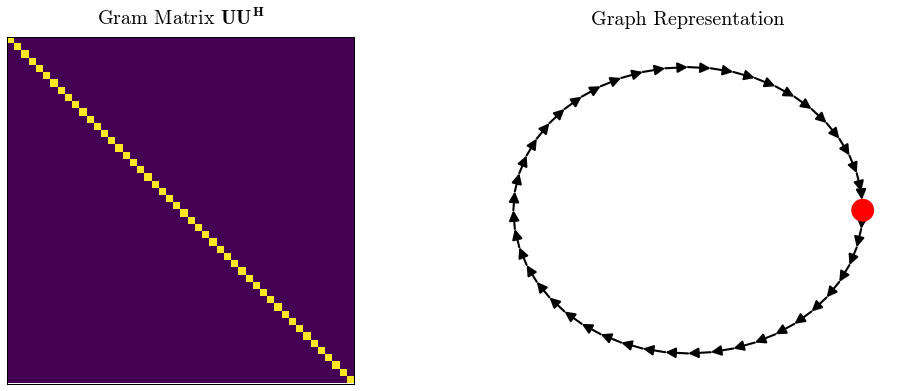

In [56]:
# Making cycle graph
N = 48
cycle = graph_utils.make_graph(N, graph_type="cycle")

N = cycle.shape[0]
L, U, V, Uinv, S, J, Sinv = graph_utils.prep_transform(cycle, gso="laplacian")

G, pos = graph_utils.vis_graph(cycle, U, 0)

dirac_signal = np.ones(N) * 0
dirac_signal[0] = 5

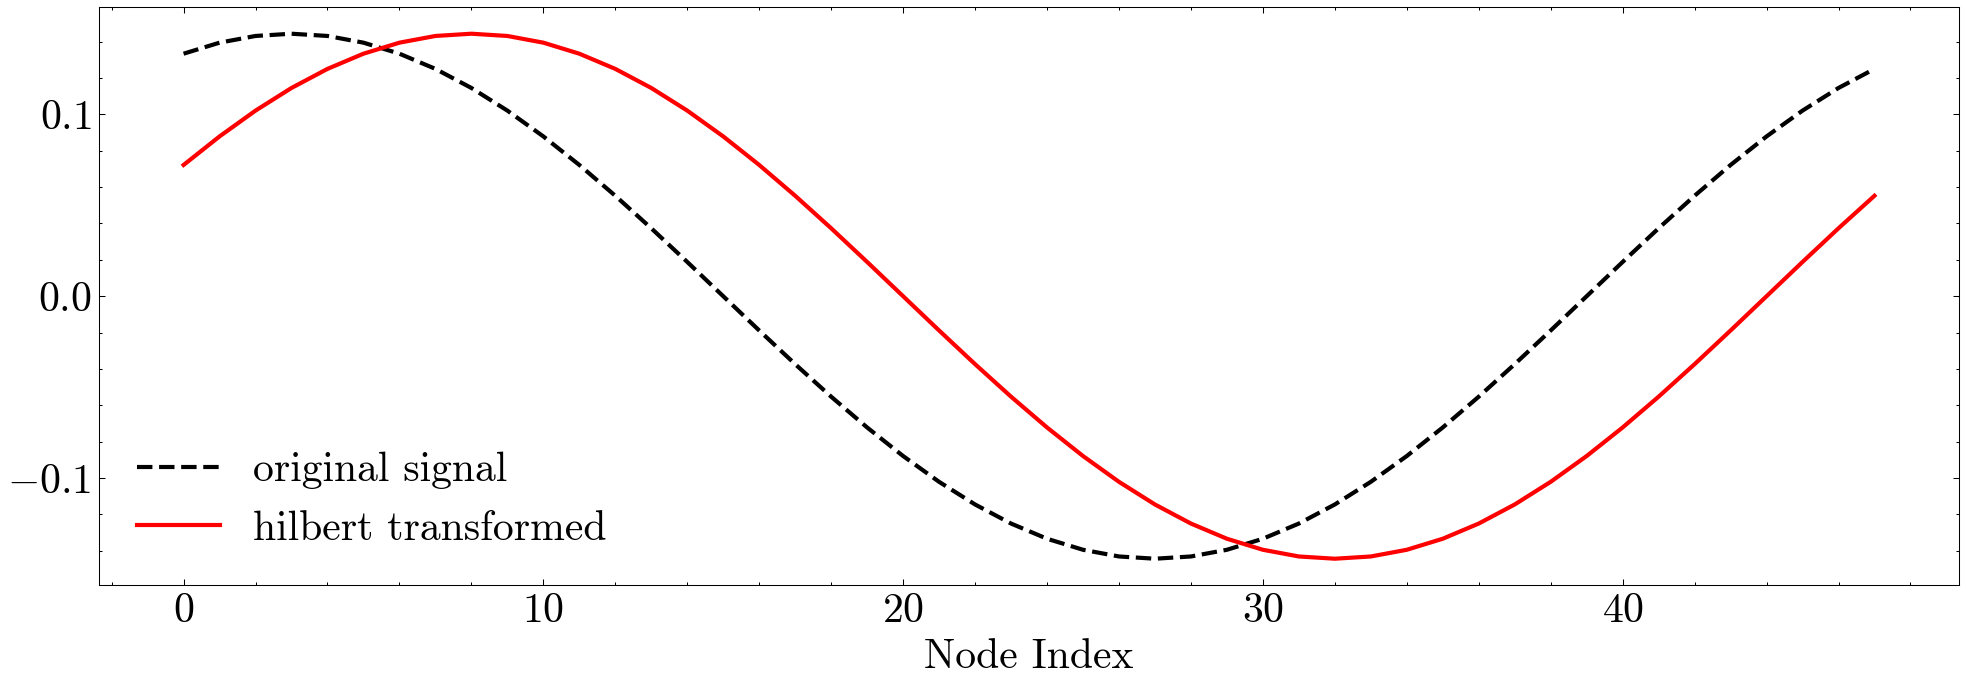

In [57]:
# Arrow are going from N -> N-1 -> N-2 -> ... -> 1
plt.figure(figsize=(16, 5))
plt.plot(U[:, 2].real, label="original signal", c="k", linestyle="--", linewidth=2)
plt.plot((operations.hilbert_transform(U[:, 2].real, U, V) * 1j).imag[::-1], label="hilbert transformed", c="r", linewidth=2)
plt.xlabel("Node Index", fontsize=20)
plt.legend(prop={"size": 20})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

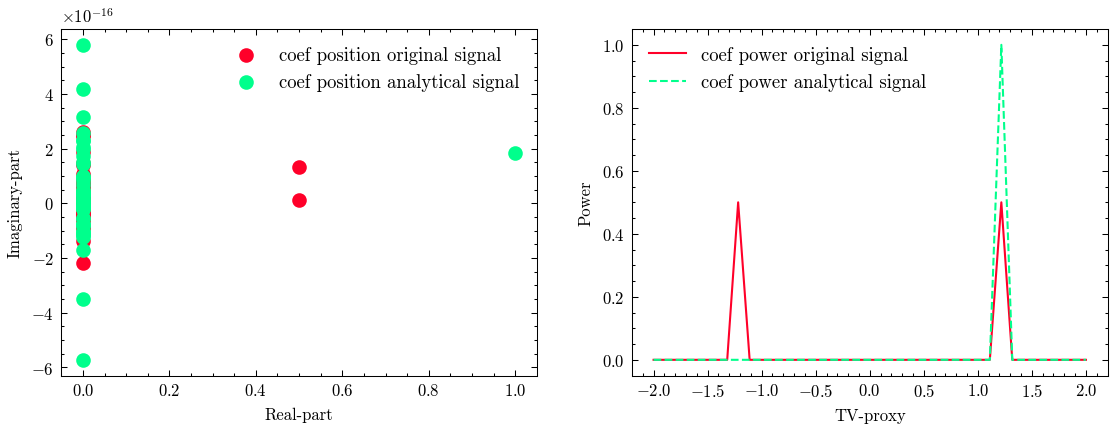

In [58]:
graph_utils.plot_spectrum_gft([U[:, 20].real, operations.analytical_signal(U[:, 20].real, U, V)],
                            U, V, Uinv=None, labels=["original signal", "analytical signal"])

### Bi-cycle

Method chosen is: eig


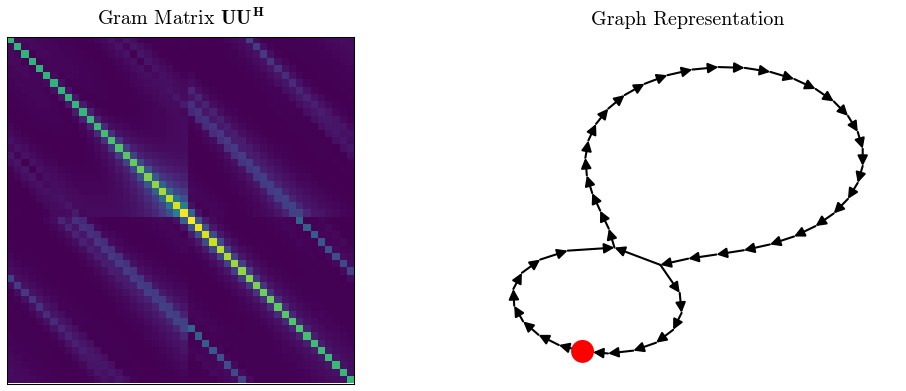

In [59]:
# Making cycle graph
N = 48
bicycle = graph_utils.make_graph(N, graph_type="bicycle")

N = bicycle.shape[0]
L, U, V, Uinv, S, J, Sinv = graph_utils.prep_transform(bicycle, gso="laplacian")

G, pos = graph_utils.vis_graph(bicycle, U, 33)

dirac_signal = np.ones(N) * 0
dirac_signal[0] = 5

/Users/mikichan/Desktop/mywork/dGSP_framework/notebooks/../src/graph_utils.py:684: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0].scatter(


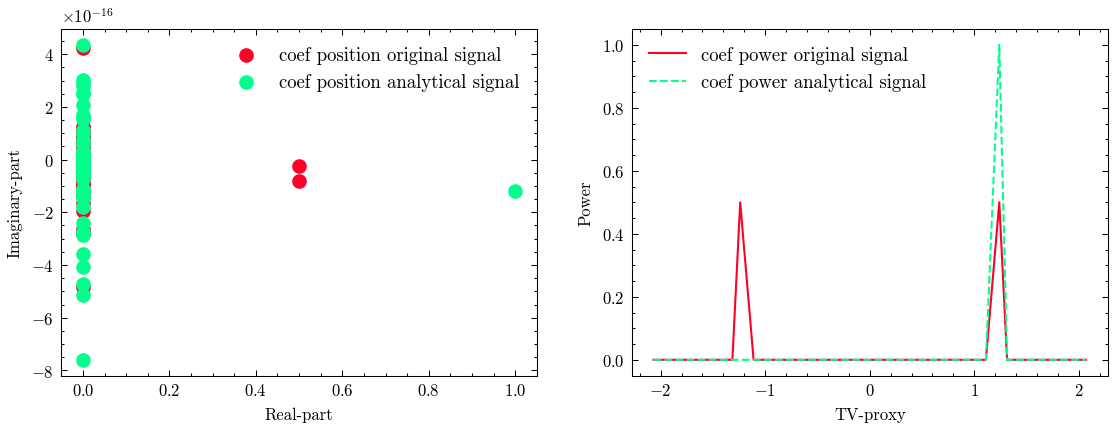

In [9]:
graph_utils.plot_spectrum_gft([U[:, 20].real, operations.analytical_signal(U[:, 20].real, U, V)],
                  U, V, Uinv=None, labels=["original signal", "analytical signal"])

Text(0.5, 1.0, 'hilbert transformed signal on graph')

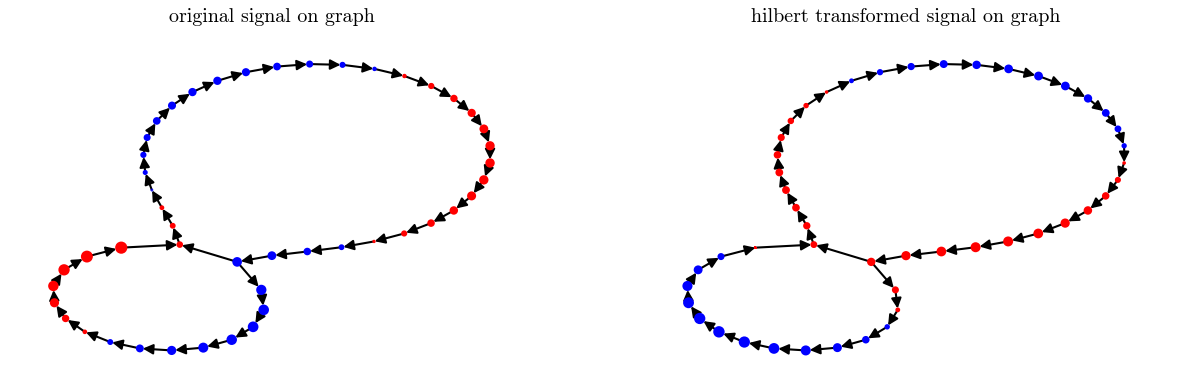

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
graph_utils.plot_graph(G, U[:, 4].real, pos, ax=ax[0])
graph_utils.plot_graph(G, operations.hilbert_transform(U[:, 4].real, U, V).real, pos, ax=ax[1])
ax[0].set_title("original signal on graph")
ax[1].set_title("hilbert transformed signal on graph")

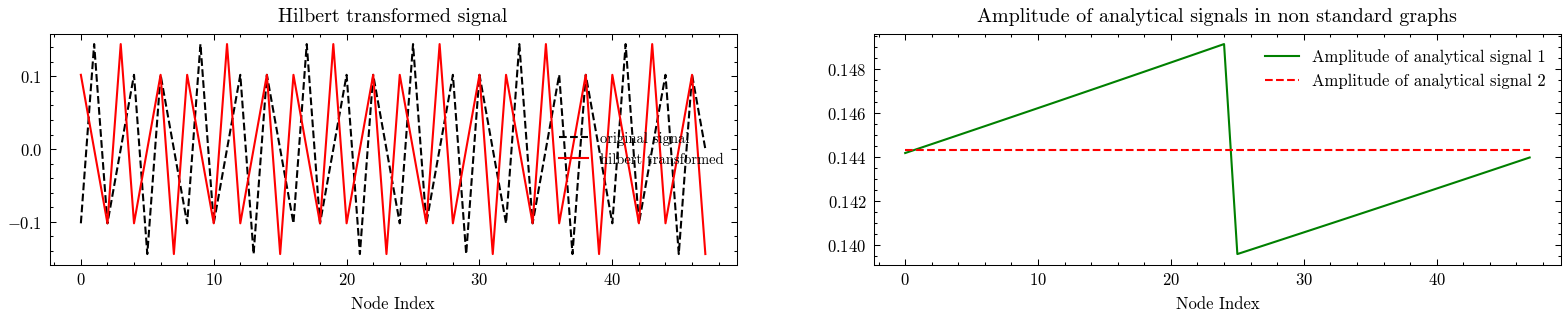

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(13, 2))
ax[0].plot(U[:, 35].real, label="original signal", c="k", linestyle="--")
ax[0].plot((operations.hilbert_transform(U[:, 35].real, U, V) * 1j).imag, label="hilbert transformed", c="r")
ax[0].set_title("Hilbert transformed signal")
ax[0].set_xlabel("Node Index")
ax[0].legend(prop={"size": 7})

ax[1].set_title("Amplitude of analytical signals in non standard graphs")
ax[1].plot(np.abs(operations.analytical_signal(U[:, 20].real, U, V)), c="g", label="Amplitude of analytical signal 1")
ax[1].plot(np.abs(operations.analytical_signal(U[:, 35].real, U, V)), c="r", label="Amplitude of analytical signal 2")
ax[1].set_xlabel("Node Index")
ax[1].legend()

## 2. Intuition of Hilbert Transform on directed Graphs


### Guiding Example 1: Flower shape

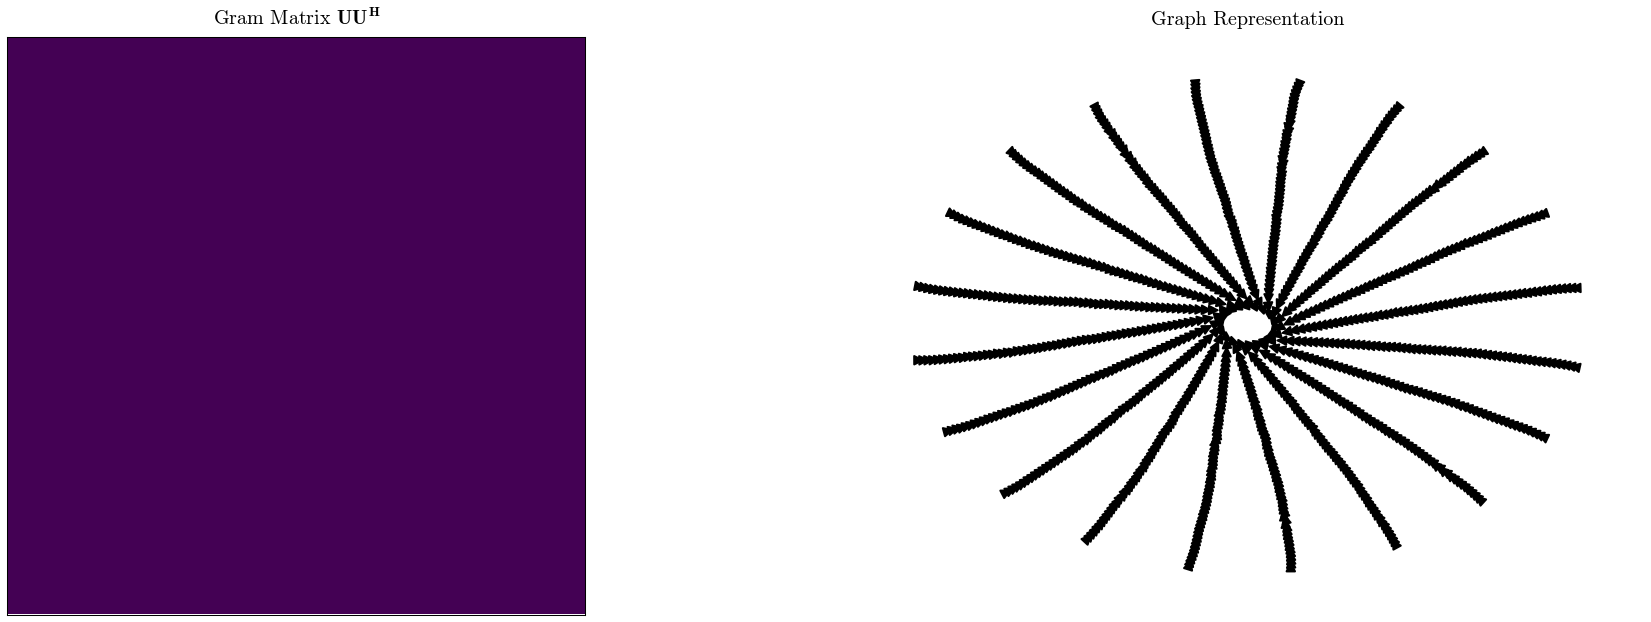

In [12]:
Nr = 60
cycle = graph_utils.make_graph(Nr, graph_type="cycle")
Nc = 20
A = np.zeros((Nc * Nr, Nc * Nr))
for k in range(Nc):
    tmp = deepcopy(cycle)
    if k in np.arange(Nc):
        tmp[-1][0] = 0
    A[k * Nr : (k + 1) * Nr, k * Nr : (k + 1) * Nr] = tmp
    if k + 1 == Nc:
        A[0, k * Nr] = 1
    else:
        A[(k + 1) * Nr, k * Nr] = 1

G, pos = graph_utils.vis_graph(A, np.zeros((Nr, Nr)), -1, figsize=(15, 5))

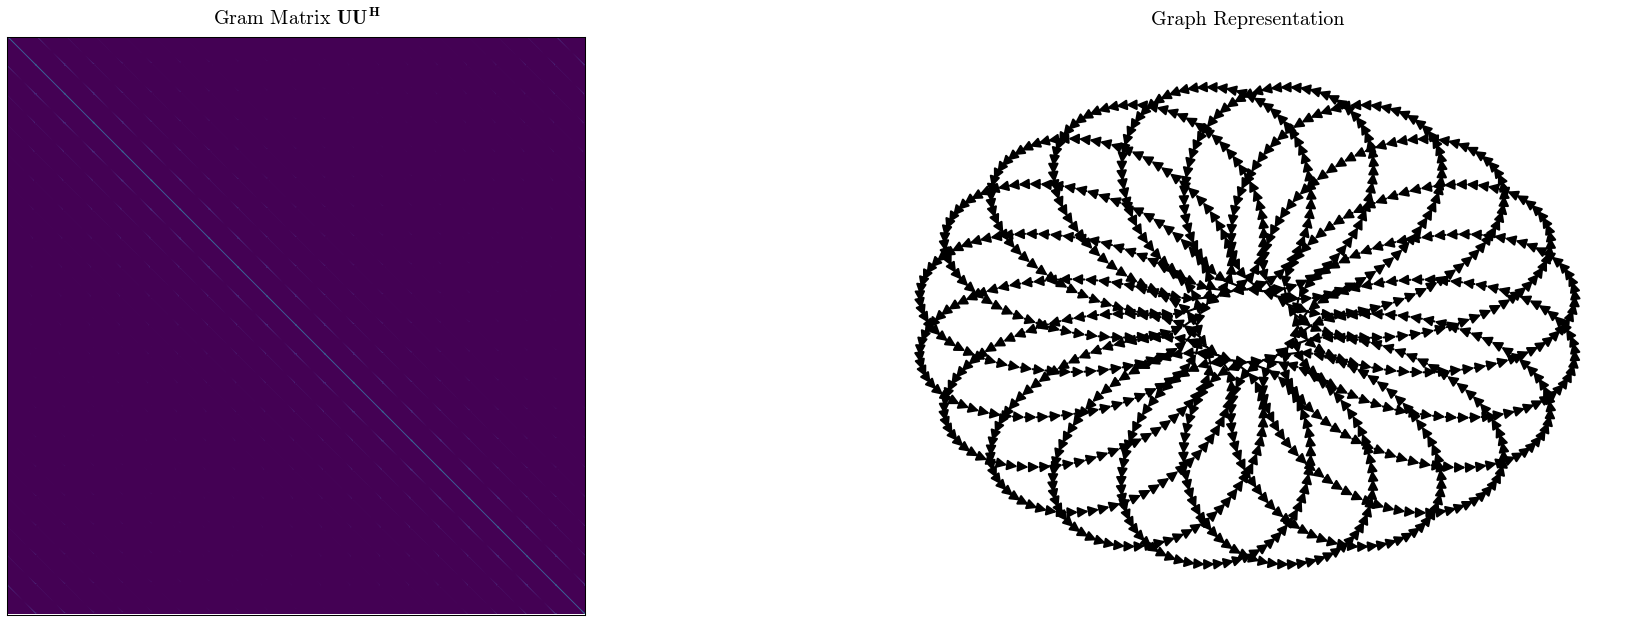

Method chosen is: eig


In [15]:
# Apply perturbation to make graph digonalizble -> invertible
newA = jordanzero_destroy.destroy_jordan_blocks(A, prefer_nodes=[0 + Nr * k for k in range(Nc)])
_, _ = graph_utils.vis_graph(newA, U, -1, figsize=(15, 5))

N = newA.shape[0]
L, U, V, Uinv, S, J, Sinv = graph_utils.prep_transform(newA, gso="adj")

\begin{align}
x_k[n] = (2k+1)\sin(\frac{k+1}{N_f}2\pi n + \frac{42k}{5N_c}\pi)
\end{align}
with $n\in[0,N_f-1]$ and $k\in[0,N_c-1]$

Text(0, 0.5, 'Signal Value')

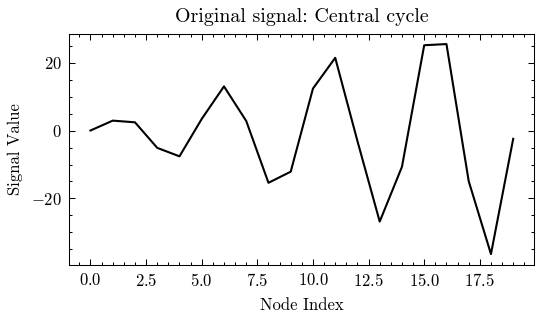

In [17]:
circle = np.linspace(0,2*np.pi, Nr)
# frequencies = [(k+5)/30*np.pi for k in range(Nc)]
frequencies = [(k) for k in range(Nc)]
phase = [42/5*np.pi/Nc * k for k in range(Nc)]
graphsig = np.concatenate([(2*v+1) * np.sin(freq * circle + phase[v]) for v, freq in enumerate(frequencies)])

xa = operations.analytical_signal(graphsig, U, V, Uinv=Uinv)
hx = operations.hilbert_transform(graphsig, U, V, Uinv=Uinv)
amp = np.abs(xa)
ang = np.arctan2(xa.imag, xa.real)

plt.figure(figsize=(4, 2))
plt.plot(graphsig[np.arange(0,Nr*Nc,Nr)])
plt.title("Original signal: Central cycle")
plt.xlabel("Node Index")
plt.ylabel("Signal Value")

Text(0.5, 1.0, 'instant amplitude distribution')

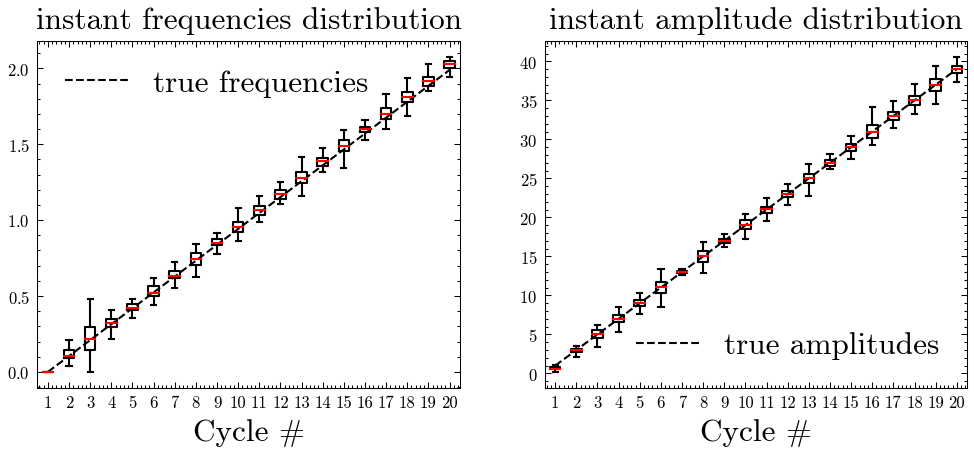

In [18]:
# freqs
unwraped = [np.zeros(Nr)] + [np.unwrap(ang[np.arange(0+k*Nr,Nr+k*Nr)]) for k in range(1,Nc)]

freqs_est = [np.concatenate([np.abs(np.diff(unwraped[k])), [np.abs(np.diff(unwraped[k])).mean()]]) for k in range(Nc)]
freqs_est_mean = [np.abs(np.diff(unwraped[k])).mean() for k in range(Nc)]

# amps
amps_cycle = [amp[np.arange(0+k*Nr,Nr+k*Nr)] for k in range(Nc)]

fig, ax = plt.subplots(1,2, figsize=(8, 3))

unwrap_ang_center = np.unwrap(ang[np.arange(0,Nr*Nc,Nr)])
freq_center = np.abs(np.diff(unwrap_ang_center, append=unwrap_ang_center[-1]))
amp_center = amp[np.arange(0,Nr*Nc,Nr)]

bp = ax[0].boxplot(freqs_est, showfliers=False)
# bp = ax[0].boxplot(freqs_est)
ax[0].set_title('instant frequencies distribution', size=15)
ax[0].plot(np.arange(1,Nc+1), np.array(frequencies)/Nr * 2 * np.pi, linestyle='--', label='true frequencies')
# ax[0].plot(np.arange(1,Nc+1), smooth1d(freq_center, 5), linestyle='--', label='center nodes')
ax[0].set_xlabel('Cycle #', size=15)
ax[0].legend(prop={'size':15})

bp = ax[1].boxplot(amps_cycle, showfliers=False)
# bp = ax[1].boxplot(amps_cycle)
ax[1].plot(np.arange(1,Nc+1), [(2*v+1) for v in range(Nc)], linestyle='--', label='true amplitudes')
ax[1].legend(prop={'size':15})
ax[1].set_xlabel('Cycle #', size=15)
ax[1].set_title('instant amplitude distribution', size=15)

Text(0.5, 0, 'node #')

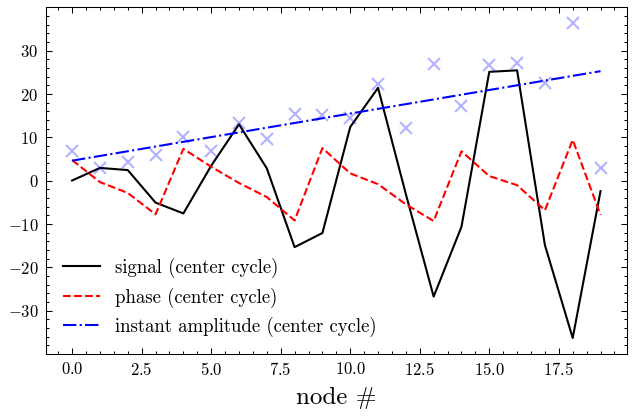

In [19]:
m,b = np.polyfit(np.arange(Nc), amp_center, 1)

plt.figure(figsize=(5,3))
plt.plot(graphsig[np.arange(0,Nr*Nc,Nr)], label='signal (center cycle)')
plt.plot(ang[np.arange(0,Nr*Nc,Nr)] * 3, label='phase (center cycle)')
plt.plot(smooth1d(amp_center, 1), linestyle='None', marker='x', alpha=0.3)
plt.plot(m * np.arange(Nc) + b, label='instant amplitude (center cycle)', alpha=1, color='b')
# plt.plot(np.sin(np.pi*1.26 * np.linspace(0,2*np.pi,Nc)) * np.array([(2*v+1) for v in range(Nc)]), label='Approximation with mean frequency', color='green')
plt.legend(prop={'size':9})
plt.xlabel('node #', size=12)

### Guiding Example 2: Lattice

Method chosen is: eig


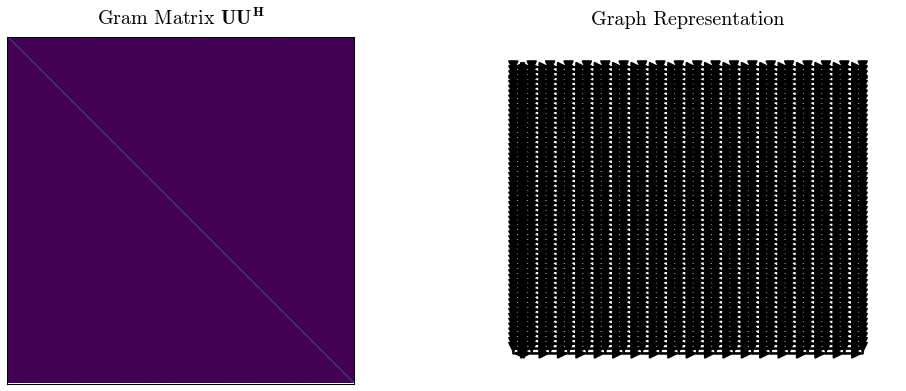

In [60]:
Nr, Nc = 20, 60
tor = graph_utils.make_graph((Nr, Nc), graph_type='torus')
N = tor.shape[0]
L, U, V, Uinv, _, _, _ = graph_utils.prep_transform(tor, gso="adj")

pos = {k: (-k % Nr, k // Nr) for k in range(0, Nr * Nc)}

G, pos = graph_utils.vis_graph(tor, U, -1, pos=pos)

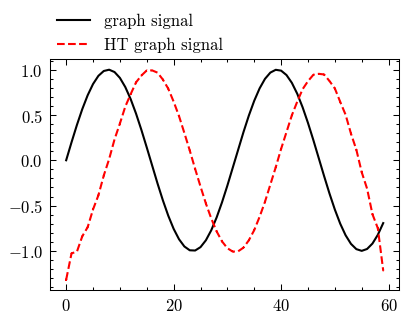

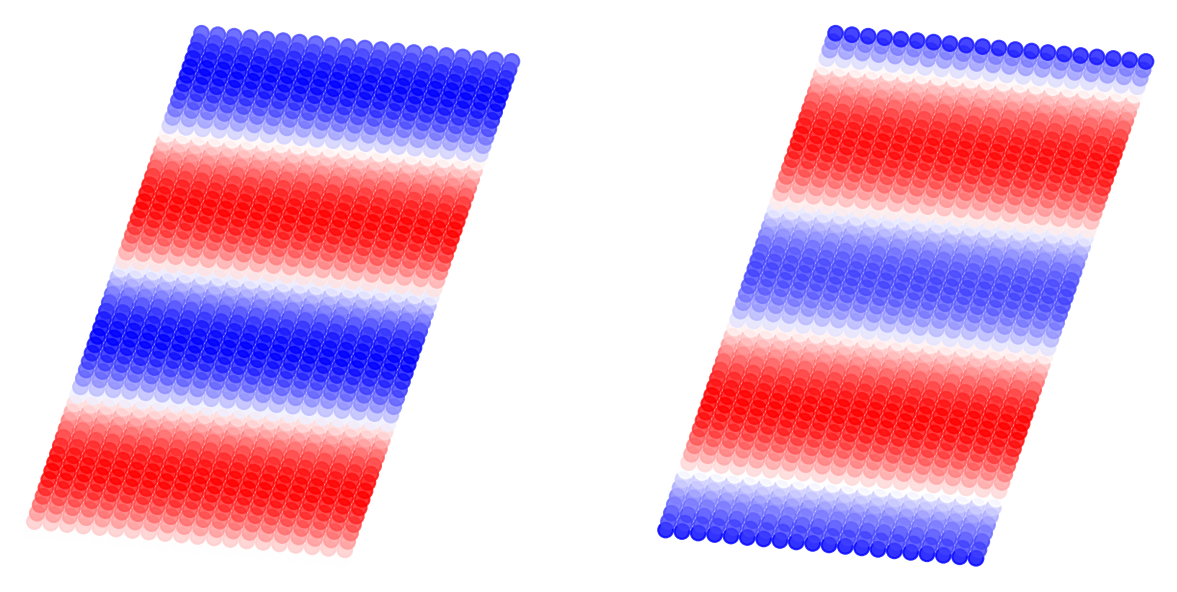

In [63]:
theta = np.radians(350)  # rotate 180 degrees
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

coords = np.array(list(pos.values()))
rotpos = (rot_matrix @ coords.T).T
rotpos = {k: rotpos[k] for k in range(len(rotpos))}

graphsig = np.sin(coords[:, 1] / 5)
xa = operations.analytical_signal(graphsig, U, V, Uinv=Uinv)
hx = operations.hilbert_transform(graphsig, U, V, Uinv=Uinv)
amp = np.abs(xa)
ang = np.arctan2(xa.imag, xa.real)

plt.plot(coords[:,1], graphsig, label='graph signal')
plt.plot(coords[:,1], hx.real, label='HT graph signal')
plt.legend(loc=(0,1))
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
nx.draw_networkx_nodes(G, rotpos, alpha=0.8, node_size=50, node_color=graphsig, cmap="bwr", ax=ax[0])
nx.draw_networkx_nodes(G, rotpos, alpha=0.8, node_size=50, node_color=hx, cmap="bwr", ax=ax[1])
ax[0].axis('off')
ax[1].axis('off')

plt.show()

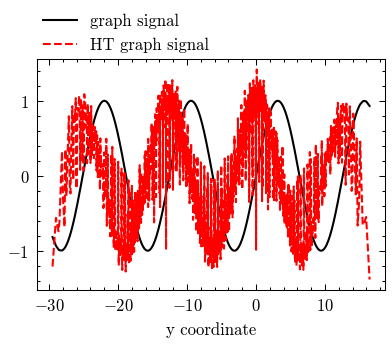

/Users/mikichan/miniconda3/envs/dGSP/lib/python3.8/site-packages/matplotlib/axes/_axes.py:4405: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


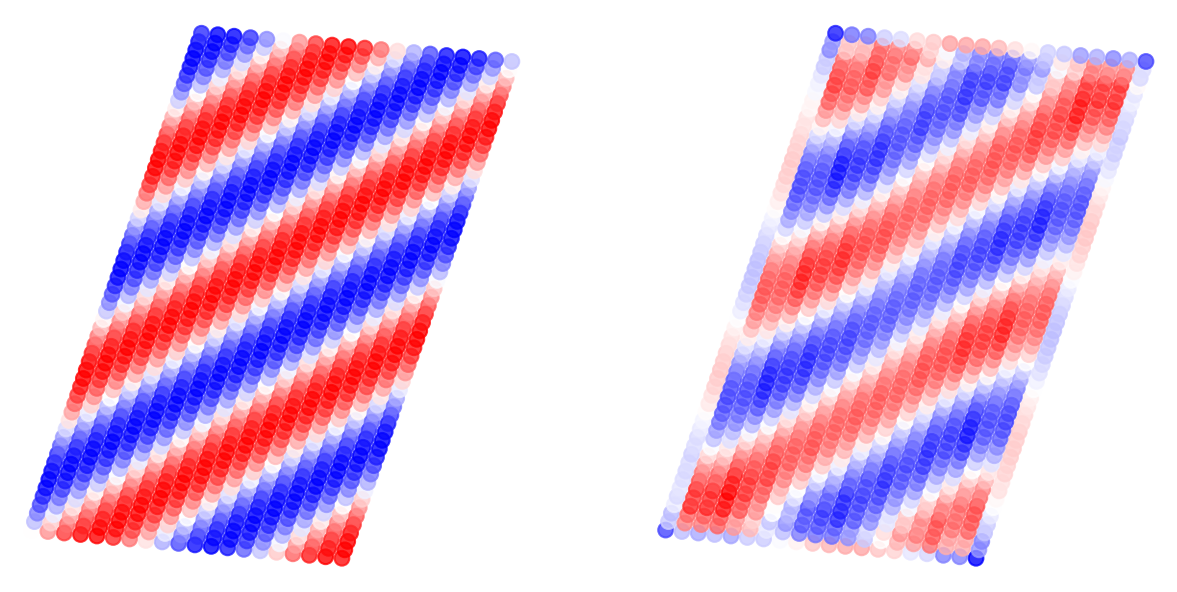

In [67]:
# Arrows go from top to bottom , i.e from positive y to negative y
theta = np.radians(120)
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

newcoords = (rot_matrix @ coords.T).T

graphsig = np.sin(newcoords[:, 1] / 2)
xa = operations.analytical_signal(graphsig, U, V, Uinv=Uinv)
hx = operations.hilbert_transform(graphsig, U, V, Uinv=Uinv)
amp = np.abs(xa)
ang = np.arctan2(xa.imag, xa.real)

plt.plot(np.sort(newcoords[:,1]), graphsig[np.argsort(newcoords[:,1])], label='graph signal')
plt.plot(np.sort(newcoords[:,1]), hx.real[np.argsort(newcoords[:,1])], label='HT graph signal')
plt.legend(loc=(0,1))
plt.xlabel('y coordinate')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
nx.draw_networkx_nodes(G, rotpos, alpha=0.8, node_size=50, node_color=graphsig, cmap="bwr", ax=ax[0])
nx.draw_networkx_nodes(G, rotpos, alpha=0.8, node_size=50, node_color=hx, cmap="bwr", ax=ax[1])
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### Guiding Example 3: Manhattan Graph

In [70]:
# Notebook specific imports / functions

import osmnx as ox
def spatial_smooth(signal, coords, size=1e-3):
    """
    Applies spatial smoothing to a signal based on given coordinates.

    Parameters
    ----------
    signal : array-like
        The input signal to be smoothed.
    coords : array-like
        The coordinates corresponding to each point in the signal.
    size : float, optional
        The smoothing size parameter. Points within this distance from each other
        will be averaged. Default is 1e-3.

    Returns
    -------
    array-like
        The smoothed signal.
    """
    ret = deepcopy(signal)
    if size <= 0:
        return ret
    for k in range(len(coords)):
        ret[k] = ret[np.linalg.norm(coords[k] - coords, axis=1) < size].mean()
    return ret

def closest_node(node, nodes):
    """
    Find the index and distance of the closest node in a set of nodes to a given node.

    Parameters
    ----------
    node (numpy.ndarray): The node to find the closest node to.
    nodes (numpy.ndarray): The set of nodes to search.

    Returns
    -------
    tuple: The index of the closest node and the distance to that node.
    """
    nodes = np.asarray(nodes)
    dist_2 = np.linalg.norm(nodes - node, axis=1)
    closest_idx = np.argmin(dist_2)
    return closest_idx, dist_2[closest_idx]

def get_line_selectors(line_selectors, nodes_coords, mindist=2e-4, maxdist=5e-4):
    """
    Specific to this use case, we select Avenues thanks to this functions on the manhattan network.

    Parameters
    ----------
        line_selectors (list): A list of points that define the line selectors.
        nodes_coords (numpy.ndarray): The coordinates of the nodes.
        mindist (float, optional): The minimum distance threshold for a node to be considered close to a line selector. Defaults to 2e-4.

    Returns
    -------
    tuple:
        - points_inline (list): A list of the coordinates of the closest nodes to the line selectors.
        - vertical_nodes (numpy.ndarray): The indices of the closest nodes in the nodes_coords array.
    """
    points_inline = []
    for point in line_selectors:
        tmp = np.linalg.norm(nodes_coords - point, axis=1)
        if np.min(tmp) < mindist:
            candidate = tuple(nodes_coords[np.argmin(tmp)])
            if points_inline == []:
                points_inline.append(candidate)
            elif np.min(np.linalg.norm(candidate - np.array(points_inline), axis=1)) > maxdist:
                points_inline.append(candidate)
            # if tuple(nodes_coords[np.argmin(tmp)]) not in points_inline:

    vertical_nodes = np.array([np.linalg.norm(nodes_coords - pts, axis=1).argmin() for pts in np.array(points_inline)])
    return points_inline, vertical_nodes

#### Graph and Graph signal defining

Text(0.5, 1.0, 'Midtown Manhattan Network')

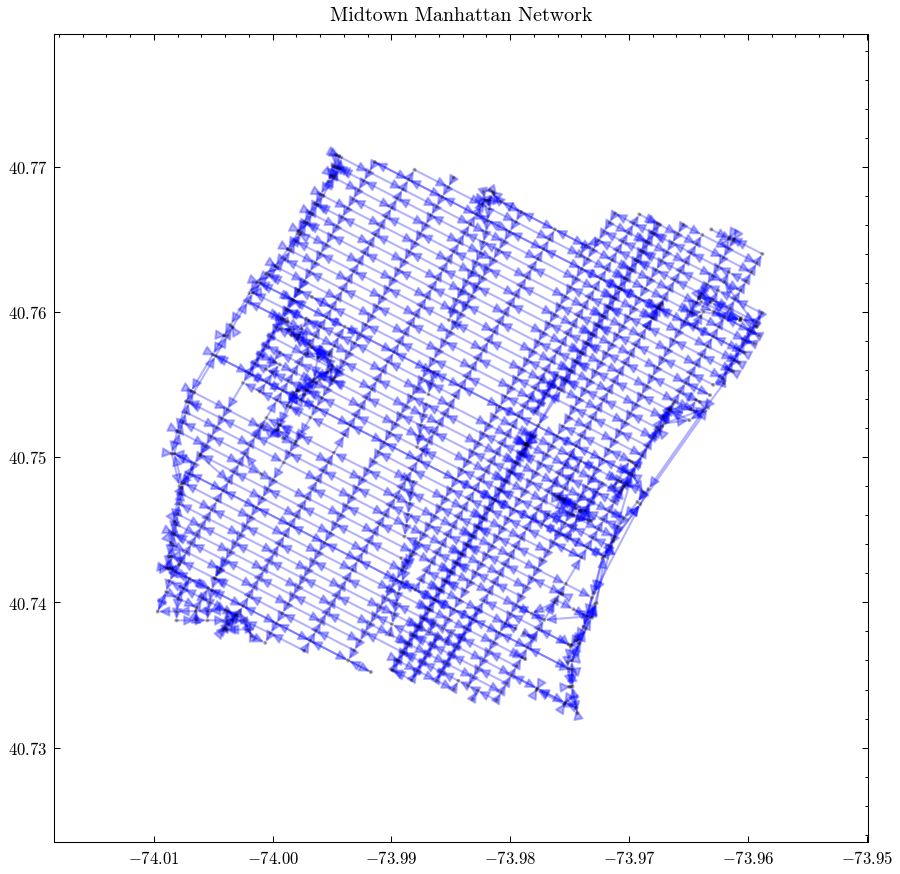

In [ ]:
from shapely import Polygon
from shapely.geometry import Point

coords = ((-73.958759, 40.727877), (-74.013777, 40.74), 
          (-74.005, 40.772677), (-73.958759, 40.765))

polygon = Polygon(coords)

place = ox.graph_from_polygon(polygon, network_type='drive')
graph = ox.project_graph(place)
graphnodes = np.array(graph)

nodes_coords = np.array([(graph.nodes[graphnodes[k]]["lon"], graph.nodes[graphnodes[k]]["lat"]) for k in range(len(graphnodes))])

adj = nx.convert_matrix.to_numpy_array(graph)
G = nx.from_numpy_array(adj, create_using=nx.MultiDiGraph())
pos = {k: nodes_coords[k] for k in range(len(G.nodes))}

fig,ax = plt.subplots(1, figsize=(7,7))
nx.draw_networkx(G, pos,alpha=0.3,width=1,with_labels=False,node_size=1,
                 edge_color="blue",node_color=np.zeros((len(G))),cmap="hot", ax=ax)

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_title('Midtown Manhattan Network')

In [76]:
# Diagonalization without preferred selected nodes
if op.exists(op.join(path_data, 'manhattan_graph/midmanhattan_graph_nopref.pkl')):
    newA = load(op.join(path_data, 'manhattan_graph/midmanhattan_graph_nopref.pkl'))
else:
    newA = jordanzero_destroy.destroy_jordan_blocks(adj.astype(float))
    newA = jordanzero_destroy.destroy_zero_eigenvals(newA.astype(float), eps=5e-3,verbose=False)
    save(op.join(path_data, 'manhattan_graph/midmanhattan_graph_nopref.pkl'), newA)

# Diagonalization with preferred selected nodes
if op.exists(op.join(path_data, '../resources/manhattan_graph/midmanhattan_graph_wpref.pkl')):
    pnewA = load(op.join(path_data, '../resources/manhattan_graph/midmanhattan_graph_wpref.pkl'))
else:
    coords = [(-74.005, 40.741), (-73.995, 40.767), (-73.968, 40.762), (-73.98, 40.737)]
    polygon = Polygon(coords)
    extremesigs = np.array([float(not polygon.contains(Point(node))) for node in nodes_coords])

    pnodes = np.where(extremesigs)[0]

    fig, ax = plt.subplots(1, figsize=(7,5))
    nx.draw_networkx(G,pos,alpha=0.8,width=0.1,with_labels=False,node_size=40,
                    edge_color="black",node_color=extremesigs, cmap='rainbow', ax=ax)

    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    pnewA = jordanzero_destroy.destroy_jordan_blocks(adj.astype(float), prefer_nodes=list(pnodes))
    pnewA = jordanzero_destroy.destroy_zero_eigenvals(pnewA.astype(float), eps=1e-3, prefer_nodes=list(pnodes), verbose=False)
    save(op.join(path_data, '../resources/manhattan_graph/midmanhattan_graph_wpref.pkl'), pnewA)

Script to obtain direction along Streets / Avenues

In [89]:
tmp = nodes_coords[np.argsort(nodes_coords[:,1])]
tmpselect = [-10, -16]

coefficients = np.polyfit(tmp[tmpselect][:,0], tmp[tmpselect][:,1], 1)
polynomial = np.poly1d(coefficients)
polynomial_vertical = np.poly1d(coefficients)

frequency_vertical = 200
frequency_horizontal = 600
manifold_vertical = np.sin(np.sort(nodes_coords[:,0]) * frequency_vertical)
manifold_horizontal = np.sin(np.sort(nodes_coords[:,1]) * frequency_horizontal)
graph_signal = np.zeros_like(manifold_vertical)

ycoords_rank = np.argsort(nodes_coords[:,0])
xcoords_rank = np.argsort(nodes_coords[:,1])

# we order the coordinates by a certain direction
direction_vector = np.array([1, polynomial_vertical[1]*2])
direction_vector2 = np.array([-polynomial_vertical[1], 1])

ranking_vector = (nodes_coords @ direction_vector)
ranking_vector2 = (nodes_coords @ direction_vector2)
xycoords_rank = np.argsort(ranking_vector)
xycoords_rank2 = np.argsort(ranking_vector2)
frequency_vertdiagonal = 1
frequency_horidiagonal = 1.5
manifold_vertdiagonal = np.sin(np.sort(zscore(ranking_vector)) * frequency_vertdiagonal)
manifold_horizdiagonal = np.sin(np.sort(zscore(ranking_vector2)) * frequency_horidiagonal)

manifold_vertdiagonalpi2 = np.sin(np.sort(zscore(ranking_vector)) * frequency_vertdiagonal + np.pi/2)
manifold_horizdiagonalpi2 = np.sin(np.sort(zscore(ranking_vector2)) * frequency_horidiagonal + np.pi/2)

graph_signal[xycoords_rank] += manifold_vertdiagonal

#### Analysis

In [ ]:
newA = load(op.join(path_data, 'manhattan_graph/midmanhattan_graph_nopref.pkl'))

G_diag = nx.from_numpy_array(newA, create_using=nx.MultiDiGraph())
_, Ua, Va, Uinva, _, _, _ = graph_utils.prep_transform(newA, gso="adj")

Method chosen is: eig


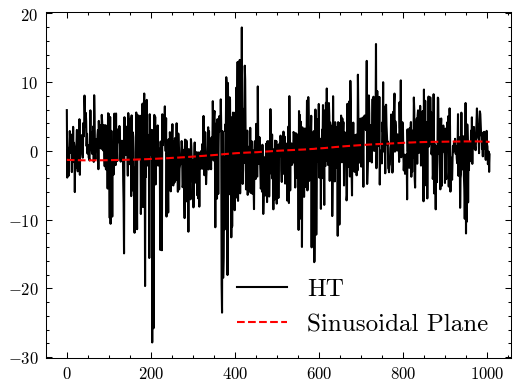

In [92]:
hx = operations.hilbert_transform(graph_signal, Ua, Va, Uinv=Uinva)

# NOTE: modify the following line to change the direction of the signal
coords_ordering = xycoords_rank

fig, ax = plt.subplots(1, figsize=(4,3))
smoothened_ht = np.zeros_like(graph_signal)

smoothened_ht[xycoords_rank] = smooth1d(hx.real[xycoords_rank], 1)

zscore_graphsignal = np.zeros_like(graph_signal)
zscore_graphsignal[coords_ordering] = zscore(graph_signal[coords_ordering])
ax.plot(smoothened_ht[coords_ordering], label='HT')
ax.plot(zscore_graphsignal[coords_ordering], label='Sinusoidal Plane')
ax.legend(prop={'size':12})
plt.show()

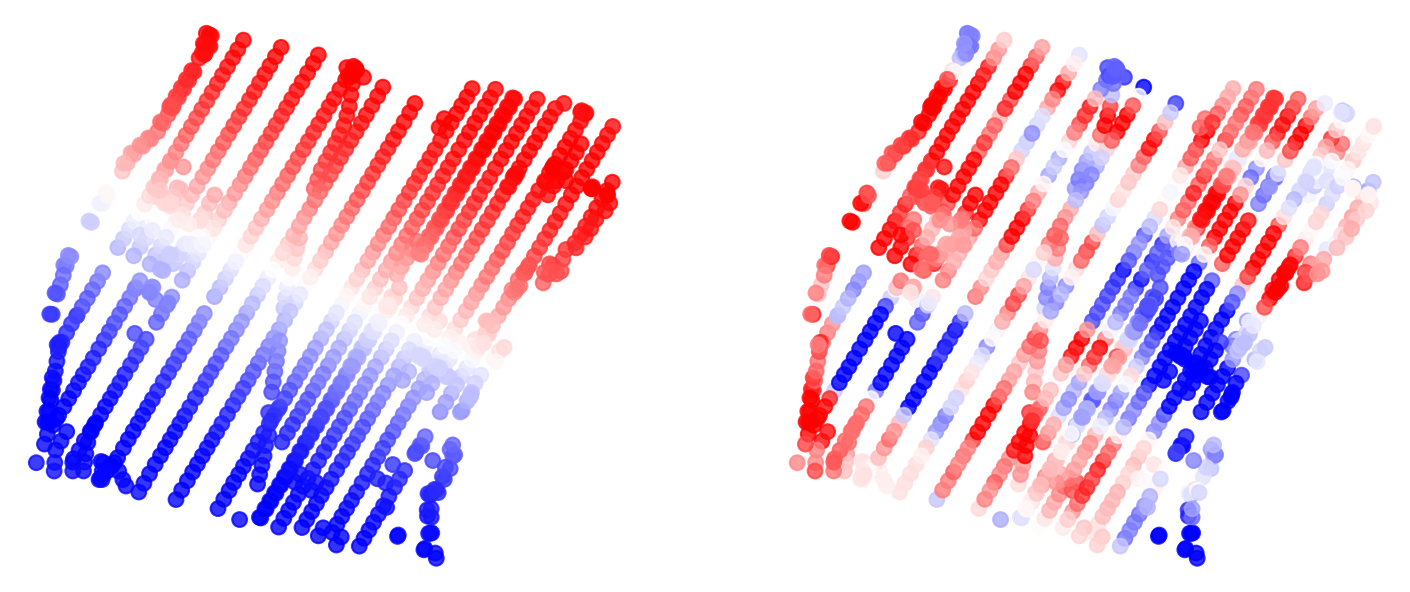

In [ ]:
ssize = 2e-3
display_ht = spatial_smooth(smoothened_ht, nodes_coords, ssize)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size=50,
                            node_color=graph_signal, cmap="bwr", ax=ax[0])
nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size=50,
                            node_color=display_ht, cmap="bwr", ax=ax[1], 
                            vmin=np.percentile(display_ht, 90), vmax=np.percentile(display_ht, 10))

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.show()

#### Animated version of phase shifted sinusoidal plane

In [ ]:
import matplotlib.animation

ssize = 2e-3
nbframes = int(np.pi * 2) * 100
phases = np.linspace(0, np.pi * 4, nbframes)
realpart = operations.inverseGFT((Va.imag == 0).astype(float) * operations.GFT(graph_signal, Ua, Uinv=Uinva), Ua).real

fig, ax = plt.subplots(figsize=(6,4))

all_displays = []
for k in range(nbframes):
    display_ht_tmp = operations.apply_phaseshift(phases[k], graph_signal, Ua, Va, Uinva).real
    display_ht_tmp = display_ht_tmp + realpart

    display_ht_tmp = spatial_smooth(display_ht_tmp, nodes_coords, ssize)
    
    all_displays.append(display_ht_tmp)

vmin_bound = np.percentile(all_displays, 10)
vmax_bound = np.percentile(all_displays, 90)

def update(num):
    ax.clear()

    display_ht = all_displays[num]

    nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size=50,
                            node_color=display_ht, cmap="bwr", ax=ax, vmin=vmin_bound, vmax=vmax_bound)
    # nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size=50,
                            # node_color=display_ht, cmap="bwr", ax=ax)

    ax.set_xticks([])
    ax.set_yticks([])


ani = matplotlib.animation.FuncAnimation(fig, update, frames=nbframes, interval=1000, repeat=True)
writervideo = matplotlib.animation.FFMpegWriter(fps=nbframes//30)
ani.save(op.join(path_data, 'manhattan_graph/sinusoid_phase-shifted.mp4'), writer=writervideo) 

plt.show()